# Linear Regression 
<!-- add an image -->
![Alternative text for image](newplot.png)



## Simple Linear Regression with Gradient Descent

### 1. Problem Formulation
Suppose we have a small dataset where we are given the number of bedrooms in certain houses, and we want to predict the price of those houses. Our goal is to predict the price of any new house that enters our dataset.

### 2. Mathematical Background
Before diving into gradient descent, let's recap some key concepts:
- **Linear Regression Equation**: The linear regression model predicts the target variable (e.g., house price) based on input features (e.g., number of bedrooms). The equation for simple linear regression is:

    $$y = \theta_0 + \theta_1 \cdot x$$

    where:
    - $y$ is the predicted price.
    - $x* is the number of bedrooms.
    - $\theta_0$ is the y-intercept (bias term).
    - $\theta_1$ is the coefficient for the number of bedrooms.

### 3. Gradient Descent
Gradient descent is an optimization algorithm used to minimize the cost function (error) in machine learning models. Here's how it works step by step:

#### 3.1. Initialize Parameters
We start by initializing the model parameters $\theta_0$ and $\theta_1$ randomly.

#### 3.2. Compute the Cost Function
The cost function measures how well our model fits the data. For linear regression, the cost function (mean squared error) is:
$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2$$

where:

- $ m $ is the number of data points.
- $h(x^{(i)})$ is the predicted value for the $i$-th data point.


#### 3.3. Update Parameters
We update the parameters using the gradient of the cost function:

$$ \theta_j := \theta_j - \alpha \frac{\partial J}{\partial \theta_j} $$

where:
- $\alpha$ is the learning rate (step size).
- $\frac{\partial J}{\partial \theta_j}$ represents the partial derivative with respect to $\theta_j$.


#### 3.4. Repeat Steps 3.2 and 3.3
We iterate the above steps until convergence (when the cost function reaches a minimum).


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plot inline
%matplotlib inline

In [5]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size 

In [7]:
# define the cost function
def computeCost(X, y, theta):
    m = y.size
    J = 0
    h = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(h-y))
    return J


In [8]:
# define the gradient descent function
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

In [9]:
# Add a column of ones to X (interception data)
X = np.stack([np.ones(m), X], axis=1)

# Initialize theta and run gradient descent
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))


Theta found by gradient descent: -3.6303, 1.1664


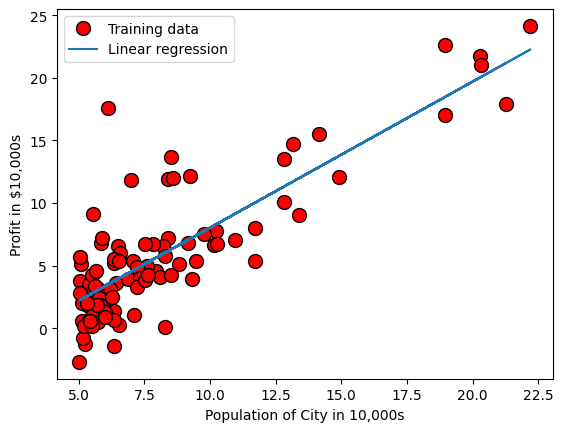

In [10]:
# Plot the linear fit
plt.plot(X[:, 1], y, 'ro', ms=10, mec='k')
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression'])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()


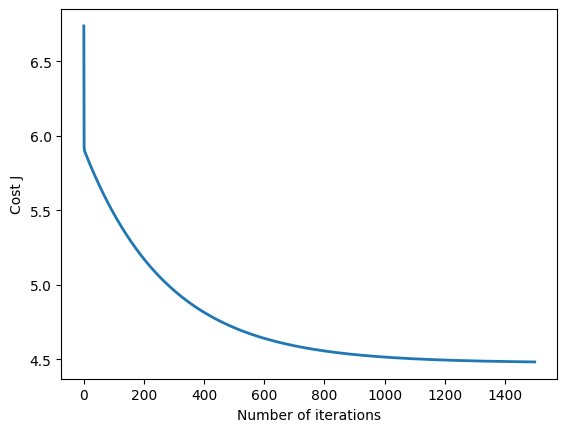

In [11]:
# plot the history of the cost function
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [23]:
# plot the cost function as a function of theta0 and theta1 in 3D interactive plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

J_vals = J_vals.T

trace = go.Surface(z=J_vals, x=theta0_vals, y=theta1_vals)
layout = go.Layout(title='Cost function J', scene=dict(xaxis=dict(title='theta0'), yaxis=dict(title='theta1')))
fig = go.Figure(data=[trace], layout=layout)
plot(fig)


'temp-plot.html'

In [19]:
# plot the concour plot of the cost function as a function of theta0 and theta1 in 3D interactive plot
trace = go.Contour(z=J_vals, x=theta0_vals, y=theta1_vals)
layout = go.Layout(title='Cost function J', xaxis=dict(title='theta0'), yaxis=dict(title='theta1'))
fig = go.Figure(data=[trace], layout=layout)
plot(fig)


'temp-plot.html'